# Aufgabe 2a

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from numpy.fft import rfft,irfft

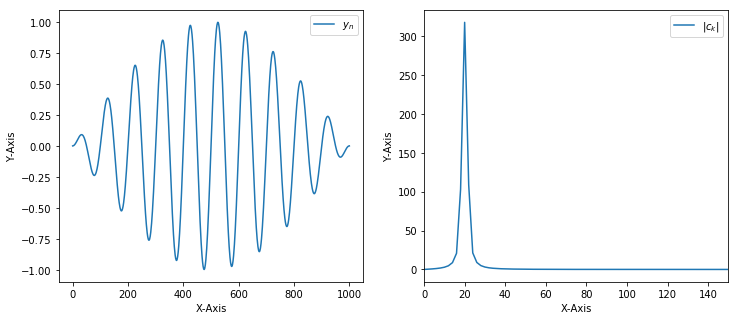

In [3]:
fig, ax = plt.subplots(1,2,figsize = (12,5))

n = np.linspace(0,1000,1000)
nf = np.linspace(0,1000,501)
N = 1000

yn = np.sin(np.pi * n/N) * np.sin(20 * np.pi* n/N)

fourier = rfft(yn)

plt.xlim(0,150)
ax[0].plot(n,yn, label="$y_n$")
ax[1].plot(nf,abs(fourier), label = "$|c_k|$")

for axis in ax:
    axis.set_xlabel('X-Axis')
    axis.set_ylabel('Y-Axis')
    axis.legend()

# Aufgabe 2b

Gleicher Ausschlag bei (Maximum Piano):  1191 Hz
Frequenz des Tones:  525.231


(0, 10000)

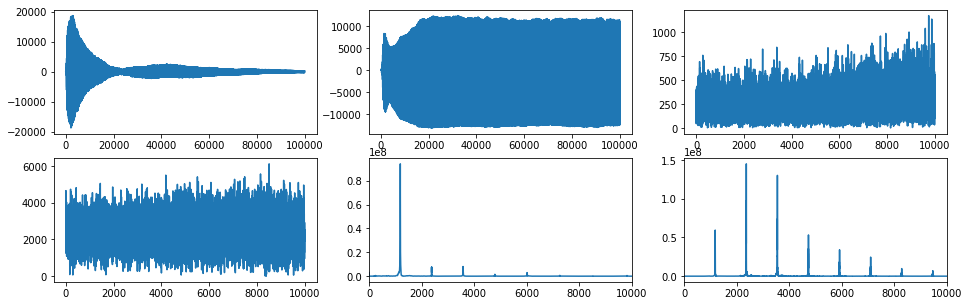

In [14]:
fig, ax = plt.subplots(2,3,figsize = (16,5))

t = np.linspace(0,100000,100000)
n = np.linspace(0,10000,10000)
u = np.linspace(0,50001,50001)

piano = np.loadtxt("piano.txt",float)
trumpet = np.loadtxt("trumpet.txt",float)

piano_dft = rfft(piano)
trumpet_dft = rfft(trumpet)

piano_second = piano_dft
trumpet_second = trumpet_dft
piano_dft = piano_dft[-10000:]
trumpet_dft = trumpet_dft[-10000:]
 

print("Gleicher Ausschlag bei (Maximum Piano): ", (list(piano_second).index(max(piano_second))), "Hz")
print("Frequenz des Tones: ", list(piano_second).index(max(piano_second)) / (len(piano) / 44100))


ax[0][0].plot(t,piano)
ax[0][1].plot(t,trumpet)
ax[0][2].plot(n,abs(piano_dft))
ax[1][0].plot(n,abs(trumpet_dft))
ax[1][1].plot(u,abs(piano_second))     
ax[1][2].plot(u,abs(trumpet_second))

# Ton c'' mit 523,25
ax[1][1].set_xlim(0,10000)
ax[1][2].set_xlim(0,10000)

# Aufgabe 2c

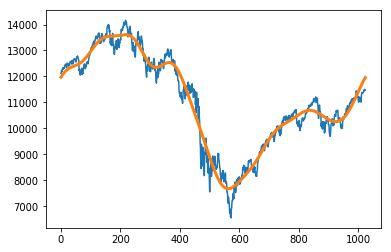

In [4]:
fig, ax = plt.subplots()

dow_unfiltered = np.loadtxt("dow.txt")

def filterData(data):
    tp = int(0.02 * len(data))
    for i in range(tp,len(data)):
        data[i] = 0
    return data

n = np.linspace(0,1024,1024)

dow_dft = rfft(dow_unfiltered)
dow_filtered = filterData(dow_dft)
dow_idft = irfft(dow_filtered)

ax.plot(n,dow_unfiltered)
ax.plot(n,dow_idft, lw =3)